In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [38]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
data= "C:\\Users\\pooja1\\Downloads\\customer_booking (1).csv"

In [4]:
pip install chardet 



     ------------------------------------ 199.1/199.1 kB 803.8 kB/s eta 0:00:00


In [6]:
import chardet

with open("C:\\Users\\pooja1\\Downloads\\customer_booking (1).csv", 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [7]:
df= pd.read_csv(data, encoding='ISO-8859-1')

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [9]:
df.shape

(50000, 14)

In [10]:

df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [11]:

X= df.drop('booking_complete',axis=1)
y= df.booking_complete         


for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [15]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [16]:

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053188
booking_origin           0.047491
flight_duration          0.016573
length_of_stay           0.009858
wants_extra_baggage      0.008840
wants_in_flight_meals    0.004814
wants_preferred_seat     0.004146
sales_channel            0.004016
purchase_lead            0.002165
flight_hour              0.001733
trip_type                0.000971
num_passengers           0.000892
flight_day               0.000000
Name: MI Scores, dtype: float64

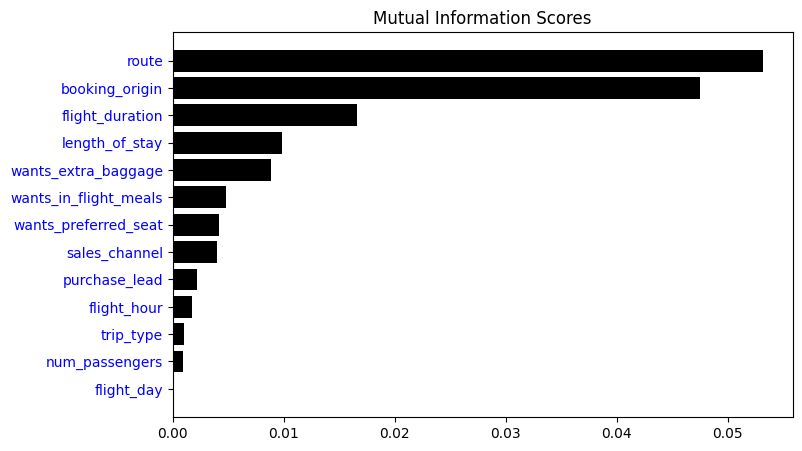

In [47]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color = 'black')
    plt.yticks(width, ticks, color = 'blue')
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5), edgecolor = 'black')
plot_mi_scores(mi_scores)

In [24]:
from sklearn.preprocessing import MinMaxScaler
# Function for scaling 
def scaler(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [25]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scaler(X)
y= df.booking_complete       


forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  85.47
AUC score:  0.5527605148105655


In [41]:
X = df.drop('booking_complete',axis=1)
# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_preds = model.predict(X_val)
print('Accuracy Score :', accuracy_score(y_val, forest_preds)*100)
print('AUC Score :', roc_auc_score(y_val, forest_preds))

Accuracy Score : 85.11
AUC Score : 0.5479018482926507


In [31]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 4.9 MB/s eta 0:00:00


In [39]:
from xgboost import XGBClassifier

X = df[features]
# one-hot-encoding
X = pd.get_dummies(X, columns=features)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
predictions = model.predict(X_val)

print('Accuracy Score :', accuracy_score(y_val, predictions)*100)
print('AUC Score :', roc_auc_score(y_val, predictions))

Accuracy Score : 84.84
AUC Score : 0.5424765097074615


In [40]:
X = df.drop('booking_complete',axis=1)
# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
xgb_preds = model.predict(X_val)

print('Accuracy Score :', accuracy_score(y_val, xgb_preds)*100)
print('AUC Score :', roc_auc_score(y_val, xgb_preds))

Accuracy Score : 84.84
AUC Score : 0.5424765097074615
